## Сохранение информации с сайтов прозводителей бытовой техники с помощью парсера

В данном блокноте показаны примеры использования парсера для извлечения различной информации о бытовой технике (описание, спецификация, фотографии продукта) с сайта производителя. Полученная информация сохраняется в виде электронных таблиц Excel и изображений JPEG.

### Содержание блокнота

>>>[Подключение необходимых библиотек](#scrollTo=3dd344de-7855-4e54-a596-184deae331c5)

>>>[Код парсера](#scrollTo=3a9cba9d-c77a-4881-9831-8bede33d2137)

>>>>[Функции для извлечения информации с веб-страниц](#scrollTo=218bab85-3e80-46f6-ae13-c04ca56e9b3a)

>>>>[Класс для парсинга веб-страницы и сохранения полученных результатов](#scrollTo=5982242c-7c88-4940-ae88-80233b54fe4d)

>>>[Проверка работы парсера](#scrollTo=e1ad5d51-7920-40a3-89a8-0dd84b9c244d)

>>>>[Haier: запуск](#scrollTo=47b97650-6471-4dd9-a641-7d1d15bb4bd1)

>>>>[Haier: результаты](#scrollTo=vBacmX9swOuZ)

>>>>[Delonghi: запуск](#scrollTo=eiPC5peUx-Zt)

>>>>[Delonghi: результаты](#scrollTo=DoRHHucUnzC-)

>>>>[Candy: запуск](#scrollTo=E7s87WkyxCbV)

>>>>[Candy: результаты](#scrollTo=uMNcWJQ3yq4E)

>>>>[Hisense: запуск](#scrollTo=J7bbNtqq0ILU)

>>>>[Hisense: результаты](#scrollTo=AznbiF5b2Y4Z)



### Подключение необходимых библиотек

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
from time import sleep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Код парсера

#### Функции для извлечения информации с веб-страниц

Описанные ниже функции сохранены в файле `parsers.py`

Функция для извлечения информации с сайта производителя **Haier**

In [ ]:
def haier(content, mode):
    """
        Возвращает спецификацию, описание и ссылки на изображения для продуктов производителя Haier

                Параметры:
                        content (BeautifulSoup object) : содержимое веб-страницы
                        mode (str) : режим {spec, descr, images}
                                 spec : спецификация продукта
                                 descr : описание продукта
                                 images : ссылки на изображение продукта


                Возвращаемое значение:
                        spec : dict
                        descr : list
                        images : list
    """

    if mode == 'spec':
        spec = {'Parameter': [item.text for item in content.find_all('div', 'col-md-8 font-light')],
          'Value': [item.text for item in content.find_all('div', 'col-md-4 font-regular')]}
        return spec

    if mode == 'descr':
        descr = [item.text for item in content.find_all('div', 'items-grid__item-subtitle--pdp')]
        return descr

    if mode == 'images':
        images = [item['src'] for item in content.find_all('img', 'slider-img-prod__img')]
        return images

Функция для извлечения информации с сайта производителя **Delonghi**

In [ ]:
def delonghi(content, mode):
    """
        Возвращает спецификацию, описание и ссылки на изображения для продуктов производителя Delonghi

                Параметры:
                        content (BeautifulSoup object) : содержимое веб-страницы
                        mode (str) : режим {spec, descr, images}
                                 spec : спецификация продукта
                                 descr : описание продукта
                                 images : ссылки на изображение продукта


                Возвращаемое значение:
                        spec : dict
                        descr : list
                        images : list
    """

    if mode == 'spec':
        spec = {'Parameter': [item.text for item in content.find_all('span', 'del-pdp__specifications__single__label')],
          'Value': [item.text.strip() for item in content.find_all('span', 'del-pdp__specifications__single__value')]}
        return spec

    if mode == 'descr':
        descr = [item.text for item in content.find_all('div', 'del-keyfeaturetile__description')]
        return descr

    if mode == 'images':
        images = [item['src'] for item in (content.find_all('section', 'swiper-wrapper')[1]).find_all('img')]
        return images

Функция для извлечения информации с сайта производителя **Candy**

In [ ]:
def candy(content, mode):
    """
        Возвращает спецификацию, описание и ссылки на изображения для продуктов производителя Candy

                Параметры:
                        content (BeautifulSoup object) : содержимое веб-страницы
                        mode (str) : режим {spec, descr, images}
                                 spec : спецификация продукта
                                 descr : описание продукта
                                 images : ссылки на изображение продукта


                Возвращаемое значение:
                        spec : dict
                        descr : list
                        images : list
    """

    if mode == 'spec':
        spec = {'Parameter': [item.text for item in content.find_all('dt', 'accordion-description-list__title')],
          'Value': [item.text for item in content.find_all('dd', 'accordion-description-list__description')]}
        return spec

    if mode == 'descr':
        descr = [item.find('p').text for item in content.find_all('div', 'triplet-content__description')]
        return descr

    if mode == 'images':
        images = [item.find('img')['src'] for item in content.find_all('div', 'pdp-main-info__img')]
        return images

Функция для извлечения информации с сайта производителя **Hisense**

In [ ]:
def hisense(content, mode):
    """
        Возвращает спецификацию, описание и ссылки на изображения для продуктов производителя Hisense

                Параметры:
                        content (BeautifulSoup object) : содержимое веб-страницы
                        mode (str) : режим {spec, descr, images}
                                 spec : спецификация продукта
                                 descr : описание продукта
                                 images : ссылки на изображение продукта


                Возвращаемое значение:
                        spec : dict
                        descr : list
                        images : list
    """

    if mode == 'spec':
        spec = {'Parameter': [], 'Value': []}
        for item in content.find_all('div', 'group group-wrap'):
            item_list = item.find_all('li')
            for idx in range(len(item_list)):
                if idx % 2 == 0:
                    spec['Parameter'].append(item_list[idx].text.strip())
                else:
                    spec['Value'].append(item_list[idx].text)
        return spec

    if mode == 'descr':
        descr = [item.text.strip() for item in content.find_all('div', 'supporting fadeInUp')]
        return descr

    if mode == 'images':
        images = [item['src'] for item in content.find_all('img', 'attachment-half-split size-half-split')]
        return images

#### Класс для парсинга веб-страницы и сохранения полученных результатов

Данный класс сохранён в файле `parse_pipelines.py`.

In [ ]:
class ParseHA:
    """
    Класс ParseHA предназначен для парсинга веб-страниц с бытовой техникой.
    Он позволяет загрузить спецификацию и описание продукта с веб-страницы и сохранить их в формате электронной таблицы Excel.
    Также есть возможность загрузить все изображения продукта с веб-страницы.

    Атрибуты
    -------------
    url : str
        адрес веб-страницы, откуда будет загружаться информация

    headers : dict
        http заголовки

    output_path: str
        абсолютный или относительный путь, по которому будут сохранены спецификация, описание и изображения

    parser : function
        функция, для парсинга информации с конкретной веб-страницы.


    part_number : str
        номер или модель продукта, для которого будет собираться информация

    Методы
    ------------
    run()
    Запускает процесс сбора и сохранения информации с веб-страницы

    Примечание:
    Если пути, указанного в output_path не существует, то он будет создан автоматически
    Атрибут parser представляет собой функцию, которая предназначена для извлечения информации с конкретного сайта с учётом особенностей его разметки.
    Для сайта конкретного производителя эта функция создаётся отдельно.
    Атрибут part_number используется для формирования имён Excel файлов и изображений.

    """

    def __init__(self, url, headers, output_path, parser, part_number):
        self.url = url
        self.headers = headers
        self.output_path = output_path
        self.parser = parser
        self.part_number = part_number
        if not os.path.exists(self.output_path):
            os.makedirs(self.output_path)

    def _get_content(self):
        """
        Метод для загрузки веб-страницы, с которой будет извлекаться информация

            Возвращаемое значение:
                            объект Beautiful Soup
        """

        print(f'Текущий адрес веб-страницы: {self.url}')
        request = requests.get(self.url, self.headers)

        if request.ok:
            print(f'Код запроса: {request.status_code} - успешно')
            content = BeautifulSoup(request.text, 'lxml')
            print('Содержимое веб-страницы успешно получено')
            return content

        else:
            print(f'Код запроса: {request.status_code} - неудача')
            print('Содержимое веб-страницы НЕ получено')

    def _get_spec(self, content):
        """
        Возвращает спецификацию продукта в виде словаря

                Параметры:
                        content (BeautifulSoup object) : содержимое веб-страницы

                Возвращаемое значение:
                        spec : dict
        """
        spec = self.parser(content, 'spec')
        return spec

    def _save_spec(self, spec):
        """
        Сохраняет спецификацию продукта в виде файла в формате Excel

                Параметры:
                        spec (dict) : спецификация

                Выходной файл:
                        part_number_spec.xlsx
        """

        if [] not in spec.values():

            number = len(spec['Value'])
            print(f'\nПолучено {number} значений')
            file_name = self.part_number + '_spec'
            file_path = os.path.join(self.output_path, f'{file_name}.xlsx')

            spec_df = pd.DataFrame(spec)
            spec_df.to_excel(file_path, index=False)

            print(f'Спецификация сохранена в {os.path.join(os.getcwd(), self.output_path)}')
            print(f'Полный путь к файлу спецификации: {os.path.join(os.getcwd(), file_path)}')

        else:
            print('Сохранить нечего. Значений нет')


    def _get_descr(self, content):
        """
        Возвращает описание продукта в виде списка

                Параметры:
                        content (BeautifulSoup object) : содержимое веб-страницы

                Возвращаемое значение:
                        descr : list
        """
        descr = self.parser(content, 'descr')
        return descr

    def _save_descr(self, descr):
        """
        Сохраняет описание продукта в виде файла в формате Excel

                Параметры:
                        descr (list) : описание

                Выходной файл:
                        part_number_descr.xlsx
        """

        if descr != []:

            number = len(descr)
            print(f'\nПолучено {number} значений')
            file_name = self.part_number + '_descr'
            file_path = os.path.join(self.output_path, f'{file_name}.xlsx')

            descr_df = pd.DataFrame(descr)
            descr_df.to_excel(file_path, index=False)

            print(f'Описание сохранено в {os.path.join(os.getcwd(), self.output_path)}')
            print(f'Полный путь к файлу описания: {os.path.join(os.getcwd(), file_path)}')
        else:
            print('Сохранить нечего. Значений нет')

    def _get_images(self, content):
        """
        Возвращает ссылки на изображения продукта

                Параметры:
                        content (BeautifulSoup object) : содержимое веб-страницы

                Возвращаемое значение:
                        images : list
        """
        images = self.parser(content, 'images')
        return images

    def _save_images(self, images):
        """
        Сохраняет изображения продукта в формате JPEG

                Параметры:
                        images (list) : ссылки на изображения

                Выходные файлы:
                        part_number_num.jpg
        """

        if images != []:
            print(f'\nНайдено {len(images)} изображений')
            num = 0
            images_path = os.path.join(self.output_path, 'images')

            if not os.path.exists(images_path):
                 os.makedirs(images_path)

            for image in images:
                num += 1
                print(f'\nИзображение {num} из {len(images)}: {image}')
                req = requests.get(image)

                if req.ok:
                    print(f'Изображение {num} загружено')
                    file_name = f'{self.part_number}_{num}.jpg'
                    print(f'Имя файла изображения {file_name}')
                    file_path = os.path.join(images_path, file_name)

                    with open(file_path, 'wb') as file:
                        file.write(req.content)
                    print(f'Изображение сохранено в {file_path}')
                    sleep(10)

                else:
                    print('Невозможно загрузить изображение')
        else:
            print('Изображения отсутствуют')


    def run(self):
        """
        Запускает процесс сбора и сохранения информации с веб-страницы

        """
        content = self._get_content()
        specification = self._get_spec(content)
        self._save_spec(specification)
        description = self._get_descr(content)
        self._save_descr(description)
        image_list = self._get_images(content)
        self._save_images(image_list)


### Проверка работы парсера

#### Haier: запуск

Получим информацию для холодильника **Haier HSR5918DIMP**. Параметры для запуска скрипта: <br>
- **адрес веб-страницы**[`url : str`]: https://www.haier-europe.com/en_GB/american-style-fridge-freezers/34005223/hsr5918dimp-uk/<br>
- **http заголовки** [`headers : dict`]: `{"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0"}`
- **путь для сохранения полученной с веб-страницы информации** [`output_path : str`]: `results/HSR5918DIMP`
- **функция-парсер** [`parser : function`]: `haier`
- **номер/модель продукта** [`part_number : str`]: `HSR5918DIMP`



**Примечания:**
- *http заголовки необходимы для корректной загрузки веб-страницы с сервера. Берём стандартные заголовки, которые используются в браузере.*
- *output_path можно задавать в абсолютном или относительном формате. Если указанного пути не сущетсвует, то он будет создан автоматически. По этому пути будут сохранены описание и спецификация продукта в формате Excel, также будут сохранены фотографии продукта в формате JPEG*
- *функция-парсер извлекает с веб-страницы информацию о продукте с учётом её разметки. Для сайта каждого производителя существует отдельная функция-парсер. В данном случае имеются функции-парсеры для следующих производителей бытовой техники: `Haier, Delonghi, Hisense, Candy`*
- *part_number используется для формирования имён файлов с полученной информацией о продукте (Excel-таблицы, изображения)*

In [ ]:
# Зададим параметры
url = 'https://www.haier-europe.com/en_GB/american-style-fridge-freezers/34005223/hsr5918dimp-uk/'            # адрес веб-страницы
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0"}    # http заголовки
output_path = 'results/HSR5918DIMP'                                                                    # путь, по которому будут сохранены данные
parser = haier                                                                                                # функция-парсер для извлечения информации
part_number = 'HSR5918DIMP'                                                                                   # номер или модель продукта

In [ ]:
# Запустим парсер
haier_fridge = ParseHA(url, headers, output_path, parser, part_number)
haier_fridge.run()

Текущий адрес веб-страницы: https://www.haier-europe.com/en_GB/american-style-fridge-freezers/34005223/hsr5918dimp-uk/
Код запроса: 200 - успешно
Содержимое веб-страницы успешно получено

Получено 110 значений
Спецификация сохранена в /content/results/HSR5918DIMP
Полный путь к файлу спецификации: /content/results/HSR5918DIMP/HSR5918DIMP_spec.xlsx

Получено 6 значений
Описание сохранено в /content/results/HSR5918DIMP
Полный путь к файлу описания: /content/results/HSR5918DIMP/HSR5918DIMP_descr.xlsx

Найдено 21 изображений

Изображение 1 из 21: https://d15v10x8t3bz3x.cloudfront.net/Immagini/2022/10/16661859/640-28_34005223_15_01_f_hsr5918dimp-uk-50321-M.jpg
Изображение 1 загружено
Имя файла изображения HSR5918DIMP_1.jpg
Изображение сохранено в results/HSR5918DIMP/images/HSR5918DIMP_1.jpg

Изображение 2 из 21: https://d15v10x8t3bz3x.cloudfront.net/Immagini/2022/4/16498678/640-28_34005223_15_02_o_hsr5918dimp-uk-M.jpg
Изображение 2 загружено
Имя файла изображения HSR5918DIMP_2.jpg
Изображени

#### Haier: результаты

Посмотрим на результаты работы парсера:

In [ ]:
os.listdir(output_path)

['HSR5918DIMP_descr.xlsx', 'HSR5918DIMP_spec.xlsx', 'images']

После работы парсера получена следующая информация о холодильнике **Haier HSR5918DIMP**:
- папка `images`, содержащая **21** изображение продукта
- Excel файл со спецификацией продукта `HSR5918DIMP_spec.xlsx`
- Excel файл с описанием продукта `HSR5918DIMP_descr.xlsx`




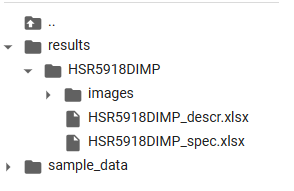

Проверим содержимое полученных файлов

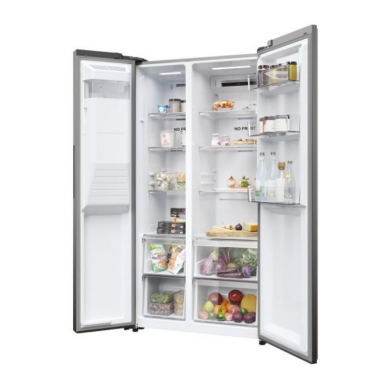

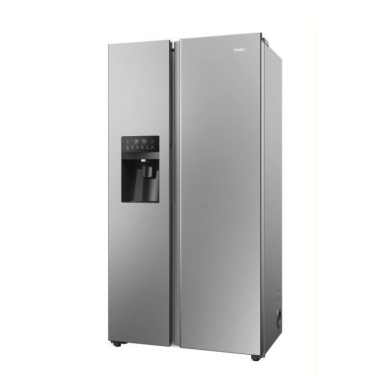

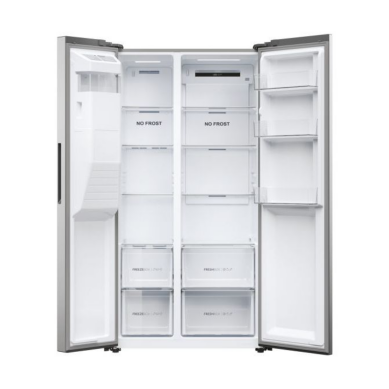

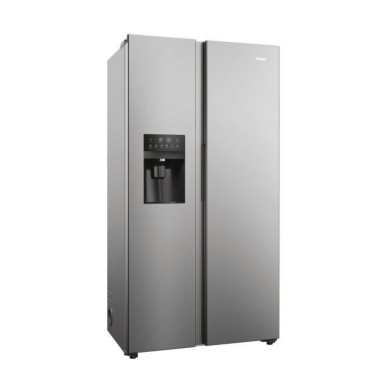

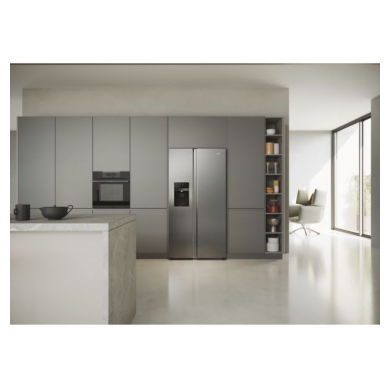

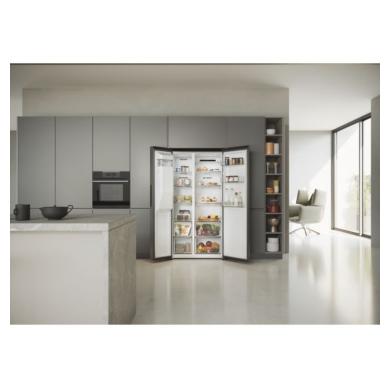

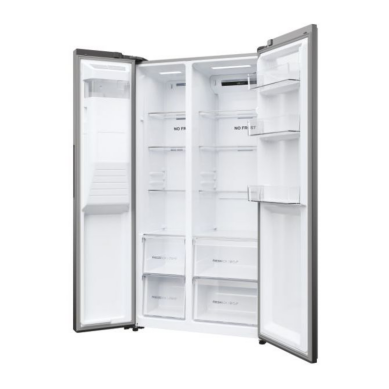

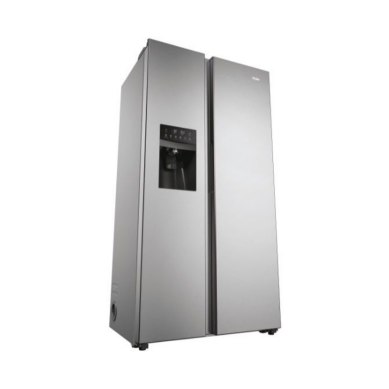

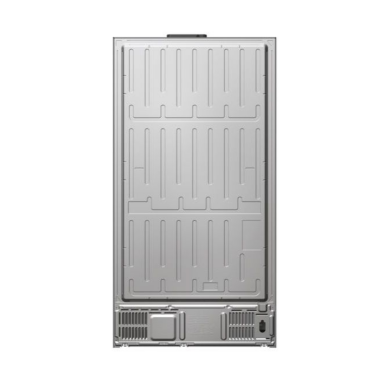

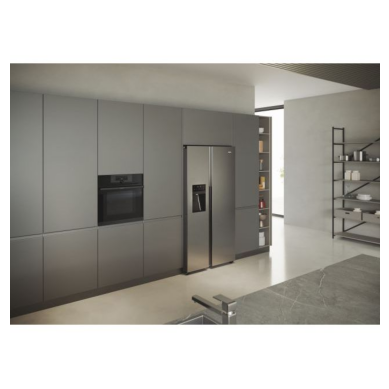

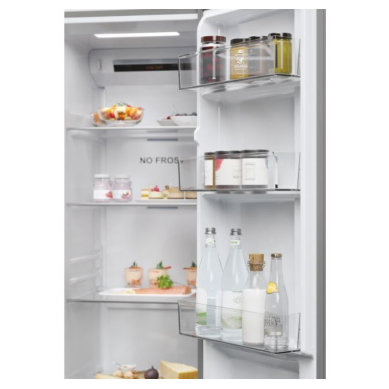

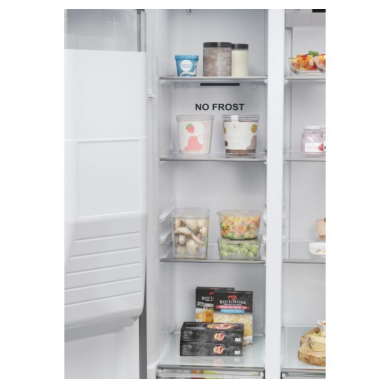

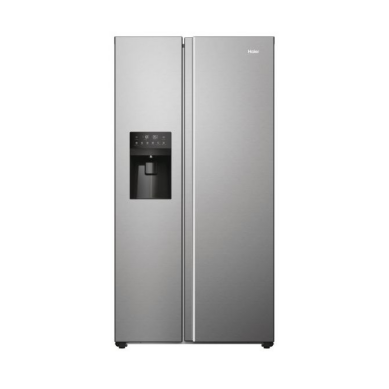

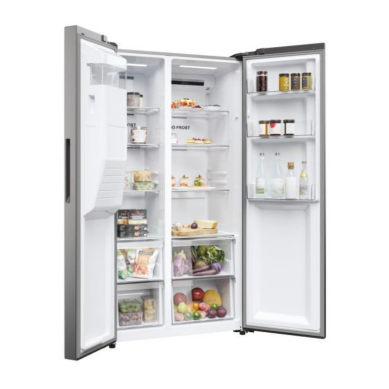

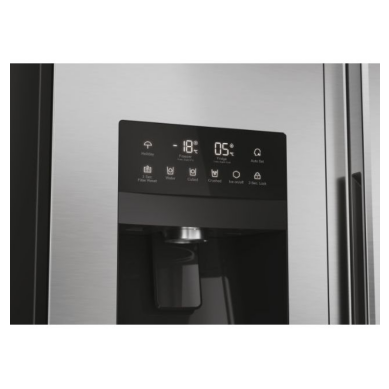

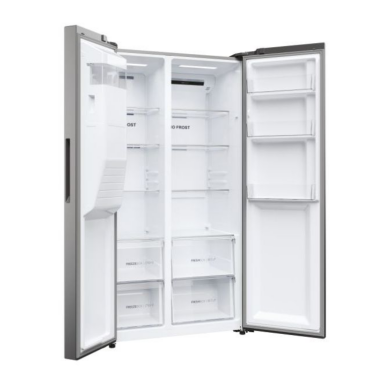

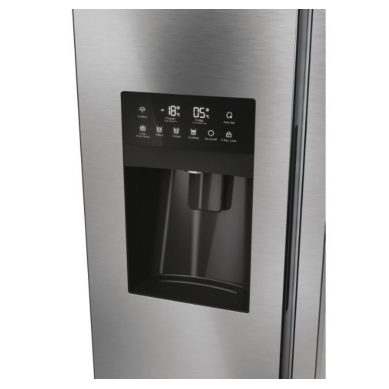

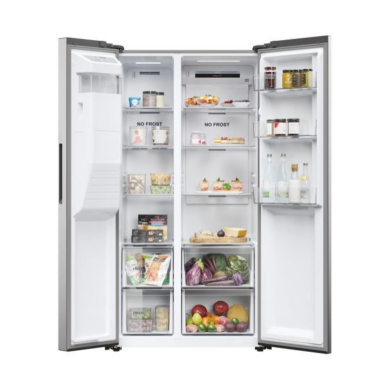

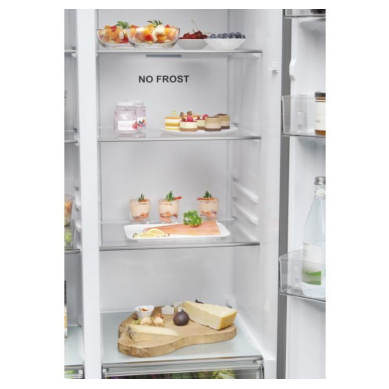

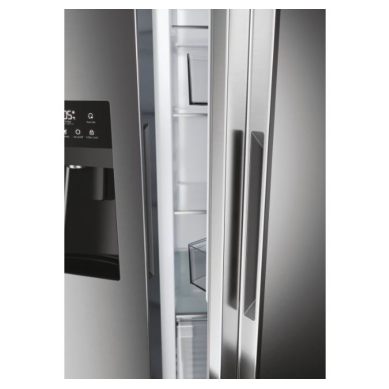

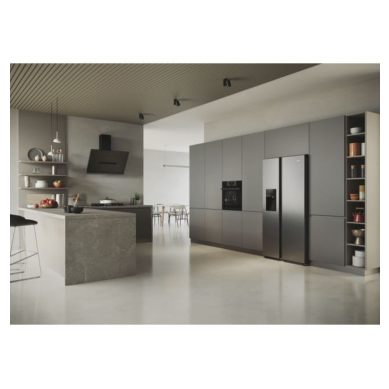

In [ ]:
# Посмотрим изображения
image_folder = os.path.join(output_path, 'images')
for image_name in os.listdir(image_folder):
  img = mpimg.imread(os.path.join(image_folder, image_name))
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [ ]:
# откроем Excel файл со спецификацией
pd.read_excel(os.path.join(output_path, 'HSR5918DIMP_spec.xlsx'))

Parameter          Value
0                            EAN Code  6901018082573
1                      Cooling system       No Frost
2                             Display            Yes
3      Product name / Commercial code    HSR5918DIMP
4                        Installation   Freestanding
..                                ...            ...
105      Packaged Product Height (mm)           1888
106  Width of the packed product (mm)            980
107        Packaged Product Depth(mm)            716
108                 Gross weight (kg)            115
109                   Net weight (kg)            105

[110 rows x 2 columns]

In [ ]:
# откроем Excel файл с описанием
pd.read_excel(os.path.join(output_path, 'HSR5918DIMP_descr.xlsx'))

0
0  Every time you open the door, it automatically...
1  Multi Air Flow is a system that distributes co...
2  The superior engineering that has gone into de...
3  Bright LED lighting makes viewing the contents...
4  Haier's slim water and ice dispenser provides ...
5  Haier's highly innovative Total No Frost techn...

#### Delonghi: запуск

Получим информацию для кофемашины **Delonghi EPAM960.75.GLM**. Параметры для запуска скрипта: <br>
- **адрес веб-страницы**[`url : str`]: https://www.delonghi.com/en-gb/epam960-75-glm-maestosa-automatic-coffee-maker/p/EPAM960.75.GLM<br>
- **http заголовки** [`headers : dict`]: `{"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0"}`
- **путь для сохранения полученной с веб-страницы информации** [`output_path : str`]: `results/EPAM96075GLM`
- **функция-парсер** [`parser : function`]: `delonghi`
- **номер/модель продукта** [`part_number : str`]: `EPAM96075GLM`

**Примечания:**
- *http заголовки необходимы для корректной загрузки веб-страницы с сервера. Берём стандартные заголовки, которые используются в браузере.*
- *output_path можно задавать в абсолютном или относительном формате. Если указанного пути не сущетсвует, то он будет создан автоматически. По этому пути будут сохранены описание и спецификация продукта в формате Excel, также будут сохранены фотографии продукта в формате JPEG*
- *функция-парсер извлекает с веб-страницы информацию о продукте с учётом её разметки. Для сайта каждого производителя существует отдельная функция-парсер. В данном случае имеются функции-парсеры для следующих производителей бытовой техники: `Haier, Delonghi, Hisense, Candy`*
- *part_number используется для формирования имён файлов с полученной информацией о продукте (Excel-таблицы, изображения)*

In [ ]:
# Зададим параметры
url = 'https://www.delonghi.com/en-gb/epam960-75-glm-maestosa-automatic-coffee-maker/p/EPAM960.75.GLM'        # адрес веб-страницы
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0"}    # заголовки
output_path = 'results/EPAM96075GLM'                                                                          # путь, по которому будут сохранены данные
parser = delonghi                                                                                             # функция-парсер для извлечения информации
part_number = 'EPAM96075GLM'                                                                                  # номер или модель продукта

In [ ]:
# Запустим парсер
delonghi_coffee = ParseHA(url, headers, output_path, parser, part_number)
delonghi_coffee.run()

Текущий адрес веб-страницы: https://www.delonghi.com/en-gb/epam960-75-glm-maestosa-automatic-coffee-maker/p/EPAM960.75.GLM
Код запроса: 200 - успешно
Содержимое веб-страницы успешно получено

Получено 33 значений
Спецификация сохранена в /content/results/EPAM96075GLM
Полный путь к файлу спецификации: /content/results/EPAM96075GLM/EPAM96075GLM_spec.xlsx

Получено 4 значений
Описание сохранено в /content/results/EPAM96075GLM
Полный путь к файлу описания: /content/results/EPAM96075GLM/EPAM96075GLM_descr.xlsx

Найдено 5 изображений

Изображение 1 из 5: https://dam.delonghi.com/600x600/assets/122189
Изображение 1 загружено
Имя файла изображения EPAM96075GLM_1.jpg
Изображение сохранено в results/EPAM96075GLM/images/EPAM96075GLM_1.jpg

Изображение 2 из 5: https://dam.delonghi.com/600x600/assets/122160
Изображение 2 загружено
Имя файла изображения EPAM96075GLM_2.jpg
Изображение сохранено в results/EPAM96075GLM/images/EPAM96075GLM_2.jpg

Изображение 3 из 5: https://dam.delonghi.com/600x600/asse

#### Delonghi: результаты

Посмотрим на результаты работы парсера:

In [ ]:
os.listdir(output_path)

['EPAM96075GLM_descr.xlsx', 'EPAM96075GLM_spec.xlsx', 'images']

После работы парсера получена следующая информация о кофемашине **Delonghi EPAM96075GLM**:
- папка `images`, содержащая **5** изображений продукта
- Excel файл со спецификацией продукта `EPAM96075GLM_spec.xlsx`
- Excel файл с описанием продукта `EPAM96075GLM_descr.xlsx`




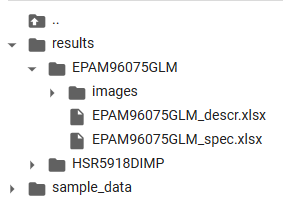

Проверим содержимое полученных файлов

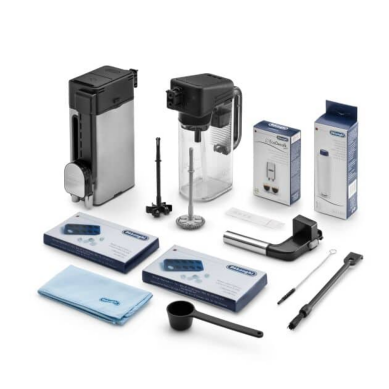

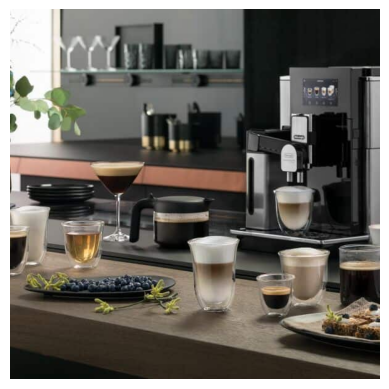

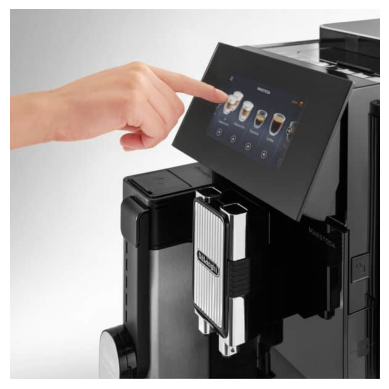

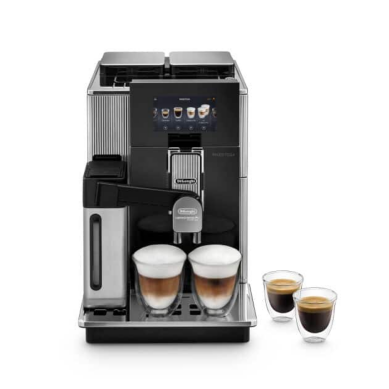

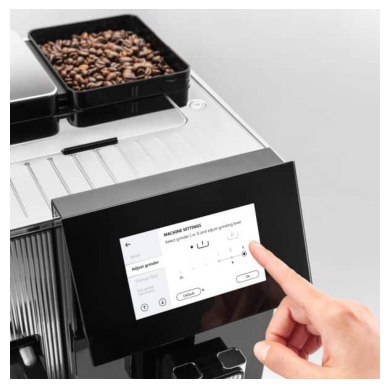

In [ ]:
# Посмотрим изображения
image_folder = os.path.join(output_path, 'images')
for image_name in os.listdir(image_folder):
  img = mpimg.imread(os.path.join(image_folder, image_name))
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [ ]:
# откроем Excel файл со спецификацией
df = pd.read_excel(os.path.join(output_path,'EPAM96075GLM_spec.xlsx'))
df.fillna('Yes', inplace=True)
df

Parameter  \
0                   Dimensions (wxdxh) (mm)   
1                               Weight (Kg)   
2                       Pump pressure (bar)   
3              Beans container capacity (g)   
4              Water container capacity (l)   
5            Grounds container capacity (n)   
6                              Energy class   
7                       Max cup height (mm)   
8                           Input power (W)   
9            Rated voltage/Frequency (V~Hz)   
10                                   Colour   
11                                Finishing   
12                        Hot Coffee drinks   
13                          Hot Milk drinks   
14                             Other drinks   
15                           Aroma function   
16          Possibility to customise length   
17                 Advanced personalisation   
18        Ability to create your own drinks   
19                                 Controls   
20                                  Display   
21                    De'Longhi Comfort app   
22                              Milk System   
23  Possibility to froth milk also manually   
24                         Cup illumination   
25                               Cup holder   
26                                Twin Shot   
27                         Thermal milk jug   
28                   Double bean containers   
29             Adaptive Grinding Technology   
30          Possibility to use water filter   
31              Programmable water hardness   
32     Possibility to use pre-ground coffee   

                                                Value  
0                                         290x468x405  
1                                                16.8  
2                                                  19  
3                                                 580  
4                                                 2.1  
5                                                  18  
6                                       Better than A  
7                                                 142  
8                                                1550  
9                                220-240 V / 50-60 Hz  
10                                        Metal black  
11                                    Metal and Glass  
12  Espresso / Coffee / Long / Doppio+ / Coffee Po...  
13  Cappuccino / 2x Cappuccino / Latte Macchiato /...  
14  Chocolate (Mix Carafe) / Cold Coffee (Mix Cara...  
15                                                Yes  
16                                                Yes  
17                                    6 user profiles  
18                                   Yes, through App  
19                                      Touch display  
20                                      5" TFT colour  
21                                    Coffee Link App  
22                          LatteCrema Hot Technology  
23                                                Yes  
24                                                Yes  
25                                    Stainless steel  
26                                                Yes  
27                                                Yes  
28                                                Yes  
29                                                Yes  
30                                                Yes  
31                                                Yes  
32                                                Yes

In [ ]:
# откроем Excel файл с описанием
pd.read_excel(os.path.join(output_path, 'EPAM96075GLM_descr.xlsx'))

0
0  Create your own recipes or use and adapt popul...
1  Full colour 5" TFT display with dual position ...
2  The exclusive LatteCrema Hot tops your beverag...
3  The high precision, electronically controlled ...

#### Candy: запуск

Получим информацию для стиральной машины **Candy CBW 47D2E-80**. Параметры для запуска скрипта: <br>
- **адрес веб-страницы**[`url : str`]: https://www.candy-home.com/en_GB/washing-machines/31800972/cbw-47d2e-80/<br>
- **http заголовки** [`headers : dict`]: `{"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0"}`
- **путь для сохранения полученной с веб-страницы информации** [`output_path : str`]: `results/CBW47D2E80`
- **функция-парсер** [`parser : function`]: `candy`
- **номер/модель продукта** [`part_number : str`]: `CBW47D2E80`

**Примечания:**
- *http заголовки необходимы для корректной загрузки веб-страницы с сервера. Берём стандартные заголовки, которые используются в браузере.*
- *output_path можно задавать в абсолютном или относительном формате. Если указанного пути не сущетсвует, то он будет создан автоматически. По этому пути будут сохранены описание и спецификация продукта в формате Excel, также будут сохранены фотографии продукта в формате JPEG*
- *функция-парсер извлекает с веб-страницы информацию о продукте с учётом её разметки. Для сайта каждого производителя существует отдельная функция-парсер. В данном случае имеются функции-парсеры для следующих производителей бытовой техники: `Haier, Delonghi, Hisense, Candy`*
- *part_number используется для формирования имён файлов с полученной информацией о продукте (Excel-таблицы, изображения)*

In [ ]:
# Зададим параметры
url = 'https://www.candy-home.com/en_GB/washing-machines/31800972/cbw-47d2e-80/'                              # адрес веб-страницы
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0"}    # заголовки
output_path = 'results/CBW47D2E80'                                                                            # путь, по которому будут сохранены данные
parser = candy                                                                                                # функция-парсер для извлечения информации
part_number = 'CBW47D2E80'                                                                                    # номер или модель продукта

In [ ]:
# Запустим парсер
candy_wash = ParseHA(url, headers, output_path, parser, part_number)
candy_wash.run()

Текущий адрес веб-страницы: https://www.candy-home.com/en_GB/washing-machines/31800972/cbw-47d2e-80/
Код запроса: 200 - успешно
Содержимое веб-страницы успешно получено

Получено 32 значений
Спецификация сохранена в /content/results/CBW47D2E80
Полный путь к файлу спецификации: /content/results/CBW47D2E80/CBW47D2E80_spec.xlsx

Получено 7 значений
Описание сохранено в /content/results/CBW47D2E80
Полный путь к файлу описания: /content/results/CBW47D2E80/CBW47D2E80_descr.xlsx

Найдено 2 изображений

Изображение 1 из 2: https://d15v10x8t3bz3x.cloudfront.net/Immagini/2020/10/16033809/1_31800972_09_01_f_cbw%2047d2e-80-M.jpg
Изображение 1 загружено
Имя файла изображения CBW47D2E80_1.jpg
Изображение сохранено в results/CBW47D2E80/images/CBW47D2E80_1.jpg

Изображение 2 из 2: https://d15v10x8t3bz3x.cloudfront.net/Immagini/2020/10/16033809/1_31800972_09_02_f_cbw%2047d2e-80-M.jpg
Изображение 2 загружено
Имя файла изображения CBW47D2E80_2.jpg
Изображение сохранено в results/CBW47D2E80/images/CBW47D2

#### Candy: результаты

Посмотрим на результаты работы парсера:

In [ ]:
os.listdir(output_path)

['CBW47D2E80_spec.xlsx', 'CBW47D2E80_descr.xlsx', 'images']

После работы парсера получена следующая информация о стиральной машине **Candy CBW 47D2E-80**:
- папка `images`, содержащая **2** изображения продукта
- Excel файл со спецификацией продукта `CBW47D2E80_spec.xlsx`
- Excel файл с описанием продукта `CBW47D2E80_descr.xlsx`




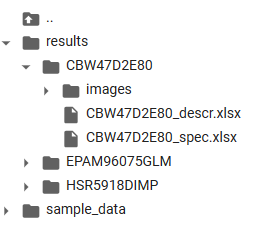

Проверим содержимое полученных файлов

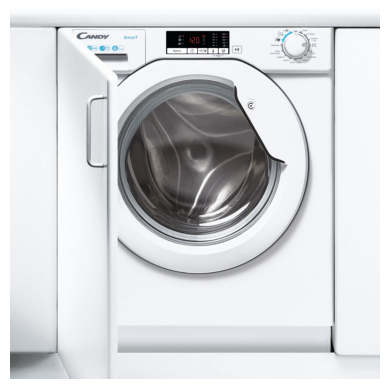

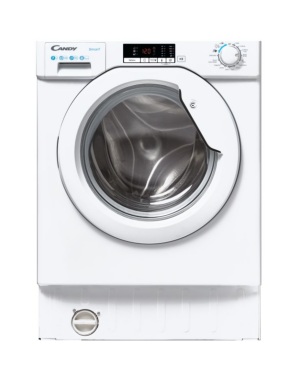

In [ ]:
# Посмотрим изображения
image_folder = os.path.join(output_path, 'images')
for image_name in os.listdir(image_folder):
  img = mpimg.imread(os.path.join(image_folder, image_name))
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [ ]:
# откроем Excel файл со спецификацией
pd.read_excel(os.path.join(output_path, 'CBW47D2E80_spec.xlsx'))

Parameter            Value
0                      Product name / Commercial code     CBW 47D2E-80
1                                        Product code         31800972
2                                            EAN Code    8059019016412
3                             Built-in / Freestanding         Built-in
4                                        Loading type            Front
5                                      Capacity (kg)                 7
6                            Maximum spin speed (rpm)             1400
7                                        Connectivity             None
8                                          Motor type               AC
9                                         Drum volume               58
10                                      Drum material  Stainless Steel
11                                          Plug type               UK
12                                        Voltage (V)          220-240
13                              Number of programmes                16
14                                Start delay options  Yes (up to 24h)
15                                            Colour             White
16                                     Colour of door            White
17                                       Energy class                D
18                       Spin-drying efficiency class                B
19  Weighted energy consumption [100 cycles, eco 4...               69
20                  Programme duration Rated capacity             3:28
21                      Noise level spinning (dB) (A)               77
22            Airborn acoustical noise emission class                C
23                                  Water consumption               41
24                              Height of the product               82
25                               Width of the product               60
26               Full depth (door and pipes included)               53
27                       Packaged Product Height (mm)              875
28                   Width of the packed product (mm)              650
29                         Packaged Product Depth(mm)              570
30                                    Net weight (kg)             65.5
31                                  Gross weight (kg)             67.5

In [ ]:
# откроем Excel файл с описанием
pd.read_excel(os.path.join(output_path, 'CBW47D2E80_descr.xlsx'))

0
0  Candy built-in washing machines have been crea...
1  The best combination of time and performance. ...
2  This program will clear any bacteria or dirt f...
3  With a delay start the laundry will be ready j...
4  This cycle is specifically designed for wool g...
5  Our machines minimise the amount of electricit...
6  This washing machine in D class, in compliance...

#### Hisense: запуск

Получим информацию для посудомоечной машины **Hisense HS693C60XADUK**. Параметры для запуска скрипта: <br>
- **адрес веб-страницы**[`url : str`]: https://hisense.co.uk/dishwashers/all-dishwashers/hs693c60xaduk//<br>
- **http заголовки** [`headers : dict`]: `{"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0"}`
- **путь для сохранения полученной с веб-страницы информации** [`output_path : str`]: `results/HS693C60XADUK`
- **функция-парсер** [`parser : function`]: `hisense`
- **номер/модель продукта** [`part_number : str`]: `HS693C60XADUK`

**Примечания:**
- *http заголовки необходимы для корректной загрузки веб-страницы с сервера. Берём стандартные заголовки, которые используются в браузере.*
- *output_path можно задавать в абсолютном или относительном формате. Если указанного пути не сущетсвует, то он будет создан автоматически. По этому пути будут сохранены описание и спецификация продукта в формате Excel, также будут сохранены фотографии продукта в формате JPEG*
- *функция-парсер извлекает с веб-страницы информацию о продукте с учётом её разметки. Для сайта каждого производителя существует отдельная функция-парсер. В данном случае имеются функции-парсеры для следующих производителей бытовой техники: `Haier, Delonghi, Hisense, Candy`*
- *part_number используется для формирования имён файлов с полученной информацией о продукте (Excel-таблицы, изображения)*

In [ ]:
# Зададим параметры
url = 'https://hisense.co.uk/dishwashers/all-dishwashers/hs693c60xaduk/'                                        # адрес веб-страницы
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0"}      # заголовки
output_path = 'results/HS693C60XADUK'                                                                           # путь, по которому будут сохранены данные
parser = hisense                                                                                                # функция-парсер для извлечения информации
part_number = 'HS693C60XADUK'                                                                                   # номер или модель продукта

In [ ]:
# Запустим парсер
hisense_dish = ParseHA(url, headers, output_path, parser, part_number)
hisense_dish.run()

Текущий адрес веб-страницы: https://hisense.co.uk/dishwashers/all-dishwashers/hs693c60xaduk/
Код запроса: 200 - успешно
Содержимое веб-страницы успешно получено

Получено 41 значений
Спецификация сохранена в /content/results/HS693C60XADUK
Полный путь к файлу спецификации: /content/results/HS693C60XADUK/HS693C60XADUK_spec.xlsx

Получено 8 значений
Описание сохранено в /content/results/HS693C60XADUK
Полный путь к файлу описания: /content/results/HS693C60XADUK/HS693C60XADUK_descr.xlsx

Найдено 8 изображений

Изображение 1 из 8: https://hisense.co.uk/app/uploads/2022/08/6-Auto-Dose-1142x856.jpg
Изображение 1 загружено
Имя файла изображения HS693C60XADUK_1.jpg
Изображение сохранено в results/HS693C60XADUK/images/HS693C60XADUK_1.jpg

Изображение 2 из 8: https://hisense.co.uk/app/uploads/2022/08/7-15-min-Fast-Cleaning-2-1142x856.jpg
Изображение 2 загружено
Имя файла изображения HS693C60XADUK_2.jpg
Изображение сохранено в results/HS693C60XADUK/images/HS693C60XADUK_2.jpg

Изображение 3 из 8: ht

#### Hisense: результаты

Посмотрим на результаты работы парсера:

In [ ]:
os.listdir(output_path)

['HS693C60XADUK_spec.xlsx', 'HS693C60XADUK_descr.xlsx', 'images']

После работы парсера получена следующая информация о посудомоечной машине **Hisense HS693C60XADUK**:
- папка `images`, содержащая **8** изображений продукта
- Excel файл со спецификацией продукта `HS693C60XADUK_spec.xlsx`
- Excel файл с описанием продукта `HS693C60XADUK_descr.xlsx`




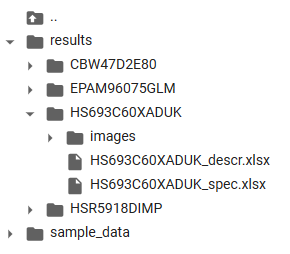

Проверим содержимое полученных файлов

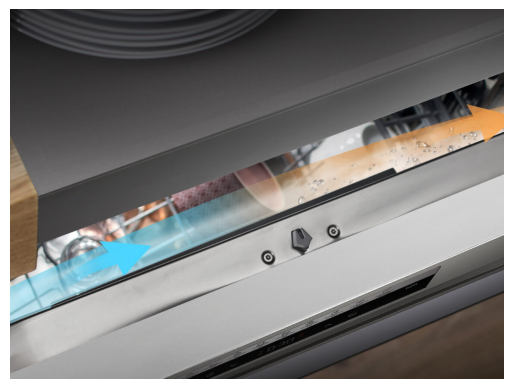

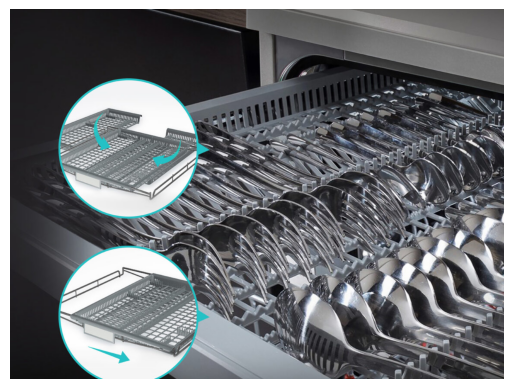

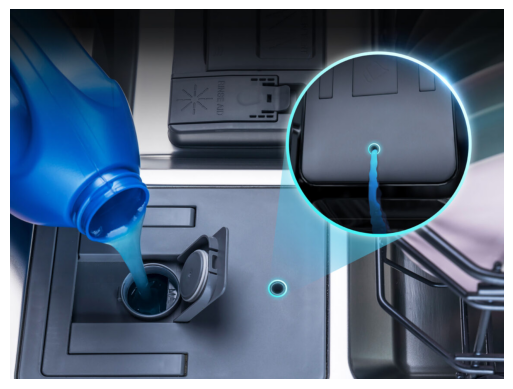

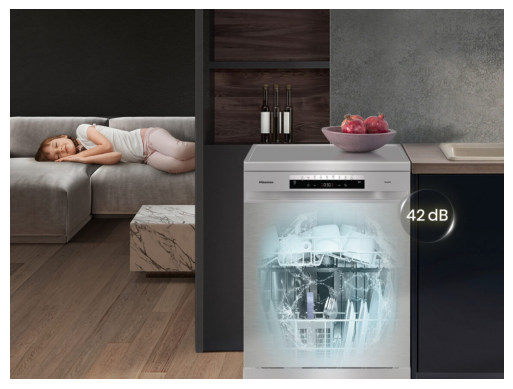

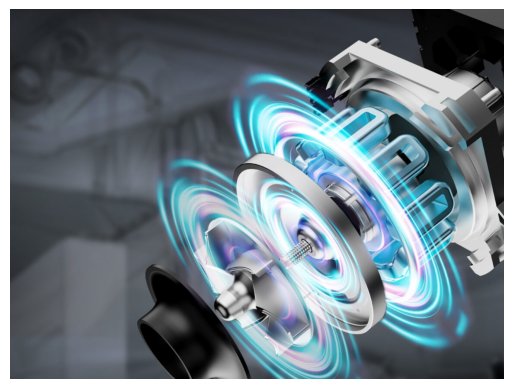

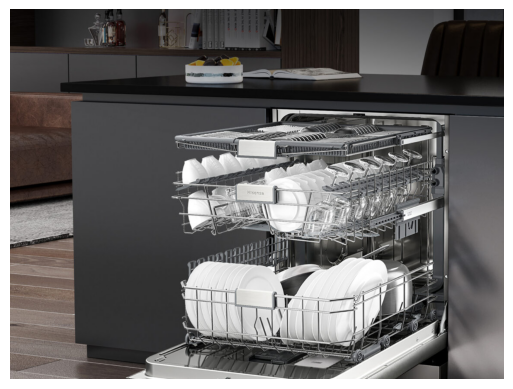

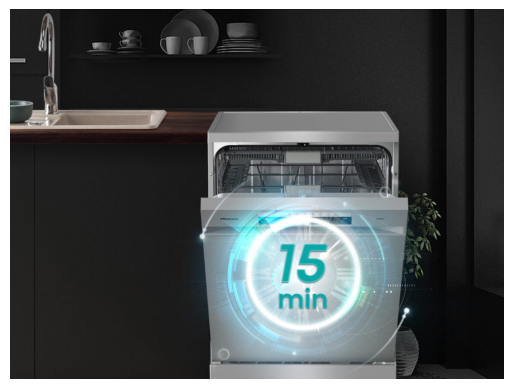

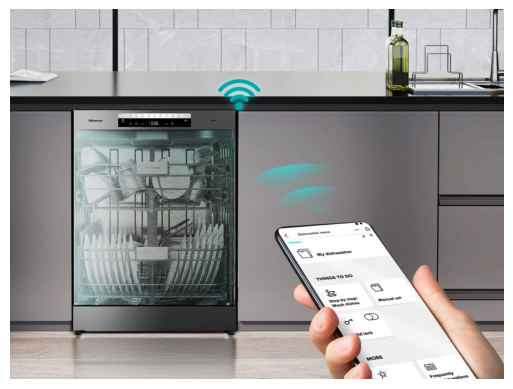

In [ ]:
# Посмотрим изображения
image_folder = os.path.join(output_path, 'images')
for image_name in os.listdir(image_folder):
  img = mpimg.imread(os.path.join(image_folder, image_name))
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [ ]:
# откроем Excel файл со спецификацией
pd.read_excel(os.path.join(output_path, 'HS693C60XADUK_spec.xlsx'))

Parameter                      Value
0                                    Model Number              HS693C60XADUK
1                               Construction Type               Freestanding
2                                       Size Type                  Full-size
3                        Number of Place Settings                         16
4                            Number of Programmes                          7
5                                         Baskets                          3
6                                      Spray Arms                          3
7                                      Water Jets                          5
8                                     Spray Zones                          5
9                                           Motor                   Inverter
10                              WIFI Connectivity                        Yes
11                               15min Quick Wash                        Yes
12                           Automatic Programmes                        Yes
13                                Intensive Cycle                        Yes
14                                   Economy Wash                        Yes
15                              Hygiene Programme                        Yes
16                    Delicates (Crystal Glasses)                        Yes
17                                  One Hour Wash                        Yes
18                                     Night Wash                        Yes
19                                 Water Softener                        Yes
20                                      Auto Dose                        Yes
21                             Adjustable Baskets                        Yes
22                                   Cutlery Tray                        Yes
23                            Rinse Aid Indicator                        Yes
24                           Salt Level Indicator                        Yes
25                       Time to End of Programme                        Yes
26                         End of cycle indicator     Sound and light signal
27                                   Control Type               Touch button
28                                    Delay Timer                        Yes
29                             Delay Timer Length               1 - 24 hours
30                                Adjustable Feet                        Yes
31                 Dimensions in mm's (W x H x D)            599 x 846 x 598
32  Dimensions in mm's (with Package) (W x H x D)            640 x 890 x 665
33                         Product Weight in kg's  41 kg (Net) 43 kg (Gross)
34                                   Energy Class                          C
35                 Energy Consumption (kWh/cycle)                       0.76
36              Power Consumption (Off / Standby)            0.49 W / 0.49 W
37                          Water Consumption (L)                       9.60
38                            Cleaning Efficiency                          A
39                              Drying Efficiency                          A
40                                    Noise Level                  42 dB (A)

In [ ]:
# откроем Excel файл с описанием
pd.read_excel(os.path.join(output_path, 'HS693C60XADUK_descr.xlsx'))

0
0  Storing enough liquid for up to 20 washes, thi...
1  Imagine throwing a dinner party and the dishes...
2  Reduce the time and effort it takes to wash ev...
3  Unload with speed, ease and no extra drying. A...
4  The upgraded inverter motor in this appliance ...
5  With noise levels of only 42dB this dishwasher...
6  Get more information from your product with WI...
7  Use space more efficiently and get things dry ...